## Importando bibliotecas

In [137]:
#Manipulação de dados

import pandas as pd
import numpy as np

# Visualização de dados
import missingno
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py

from wordcloud import WordCloud, STOPWORDS


## Carregando conjunto de dados e primeiras informações

In [2]:
df = pd.read_csv("movies.csv")

In [3]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df.tail()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5796,100000000,"[{'id': 16, 'name': 'Animação'}, {'id': 28, 'n...",NaN,431693,"[{'id': 470, 'name': 'spy'}, {'id': 1436, 'nam...",en,Spies in Disguise,Super spy Lance Sterling and scientist Walter ...,48.499,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",...,171616764,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Super Spy. Super Fly.,Spies in Disguise,7.684,2319,"[{'adult': False, 'gender': 2, 'id': 2888, 'kn...","[{'adult': False, 'gender': 1, 'id': 611, 'kno..."
5797,40000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.sonypictures.com/movies/littlewomen,331482,"[{'id': 242, 'name': 'new york city'}, {'id': ...",en,Little Women,Four sisters come of age in America in the aft...,40.786,"[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu...",...,216601214,135.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Own your story,Little Women,7.918,4933,"[{'adult': False, 'gender': 1, 'id': 36592, 'k...","[{'adult': False, 'gender': 2, 'id': 376, 'kno..."
5798,100000000,"[{'id': 10752, 'name': 'Guerra'}, {'id': 18, '...",NaN,530915,"[{'id': 2504, 'name': 'world war i'}, {'id': 4...",en,1917,"At the height of the First World War, two youn...",43.480,"[{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...",...,374733942,119.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Time is the enemy,1917,7.974,9955,"[{'adult': False, 'gender': 2, 'id': 146750, '...","[{'adult': False, 'gender': 2, 'id': 153, 'kno..."
5799,25000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,522212,"[{'id': 934, 'name': 'judge'}, {'id': 6139, 'n...",en,Just Mercy,The powerful true story of Harvard-educated la...,15.242,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...",...,50401502,137.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Every generation has its hero. Meet ours.,Just Mercy,7.939,1760,"[{'adult': False, 'gender': 2, 'id': 135651, '...","[{'adult': False, 'gender': 0, 'id': 297, 'kno..."
5800,0,"[{'id': 18, 'name': 'Drama'}]",NaN,565307,"[{'id': 378, 'name': 'prison'}, {'id': 2501, '...",en,Clemency,Years of carrying out death row executions hav...,6.907,"[{'id': 6831, 'logo_path': '/fWSI4EjIDEEzCNJC8...",...,309776,112.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Clemency,6.611,72,"[{'adult': False, 'gender': 1, 'id': 1981, 'kn...","[{'adult': False, 'gender': 1, 'id': 1981, 'kn..."


In [5]:
df.shape

(5801, 22)

In [6]:
linhas, colunas = df.shape

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                5801 non-null   int64  
 1   genres                5801 non-null   object 
 2   homepage              1819 non-null   object 
 3   id                    5801 non-null   int64  
 4   keywords              5801 non-null   object 
 5   original_language     5801 non-null   object 
 6   original_title        5801 non-null   object 
 7   overview              5795 non-null   object 
 8   popularity            5801 non-null   float64
 9   production_companies  5801 non-null   object 
 10  production_countries  5801 non-null   object 
 11  release_date          5800 non-null   object 
 12  revenue               5801 non-null   int64  
 13  runtime               5799 non-null   float64
 14  spoken_languages      5801 non-null   object 
 15  status               

In [8]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,5.801000e+03,5801.000000,5801.000000,5.801000e+03,5799.000000,5801.000000,5801.000000
mean,2.918906e+07,125615.863989,25.588242,8.619144e+07,106.932402,6.174183,937.874677
std,4.276349e+07,178582.119876,42.336933,1.864947e+08,22.372276,1.160783,1800.617662
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.000000e+00,9728.000000,5.871930,0.000000e+00,94.000000,5.700000,67.000000
50%,1.300000e+07,24664.000000,14.566664,1.743651e+07,104.000000,6.300000,298.000000
75%,4.000000e+07,205321.000000,30.556135,9.057419e+07,118.000000,6.900000,973.000000
max,3.800000e+08,992536.000000,875.581305,2.797801e+09,338.000000,10.000000,25066.000000


In [9]:
df.describe(include = "O")

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,crew
count,5801,1819,5801,5801,5801,5795,5801,5801,5800,5801,5801,4822,5801,5801,5801
unique,1443,1742,4700,38,5296,5303,4185,957,3601,639,3,4374,5289,5271,5287
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,The Lion King,When a professor develops a vaccine that elimi...,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2019-11-08,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,Skin Trade,[],[]
freq,370,4,475,5478,4,4,372,2977,15,3171,5793,6,4,49,29


In [10]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

Dicionário de dados 

* budget: Orçamento do Filmes em Dólares
* genres: Lista de Dicionários com todos os gêneros associados ao filme
* homepage: Site oficial do filme
* id: Identificação (ID) do filme
* keywords: Palavras chaves associadas ao filme
* original_language: Idioma original do filme
* original_title: Título original do filme
* overview: Breve descrição do filme
* popularity: Pontuação dada pelo TMDB
* production_companies: Produtoras envolvidas na produção do filme
* release_data: Data de Lançamento do Filme
* revenue: Receita Total do filme em dólares
* runtime: Tempo de execução do filme em minutos
* spoken_language: Idiomas falados no filme
* status: Status do filme (lançado, para ser lançado, anunciado, etc)
* tagline: Tagline do filme
* title: Título oficial do filme
* vote_average: Avaliação média do filme
* vote_count: Número de votos contabilizados pelo TMDB
* cast: Elenco do filme
* crew: Equipe Técnica

### Dados faltantes

In [11]:
df.isnull().sum()

budget                     0
genres                     0
homepage                3982
id                         0
keywords                   0
original_language          0
original_title             0
overview                   6
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  979
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

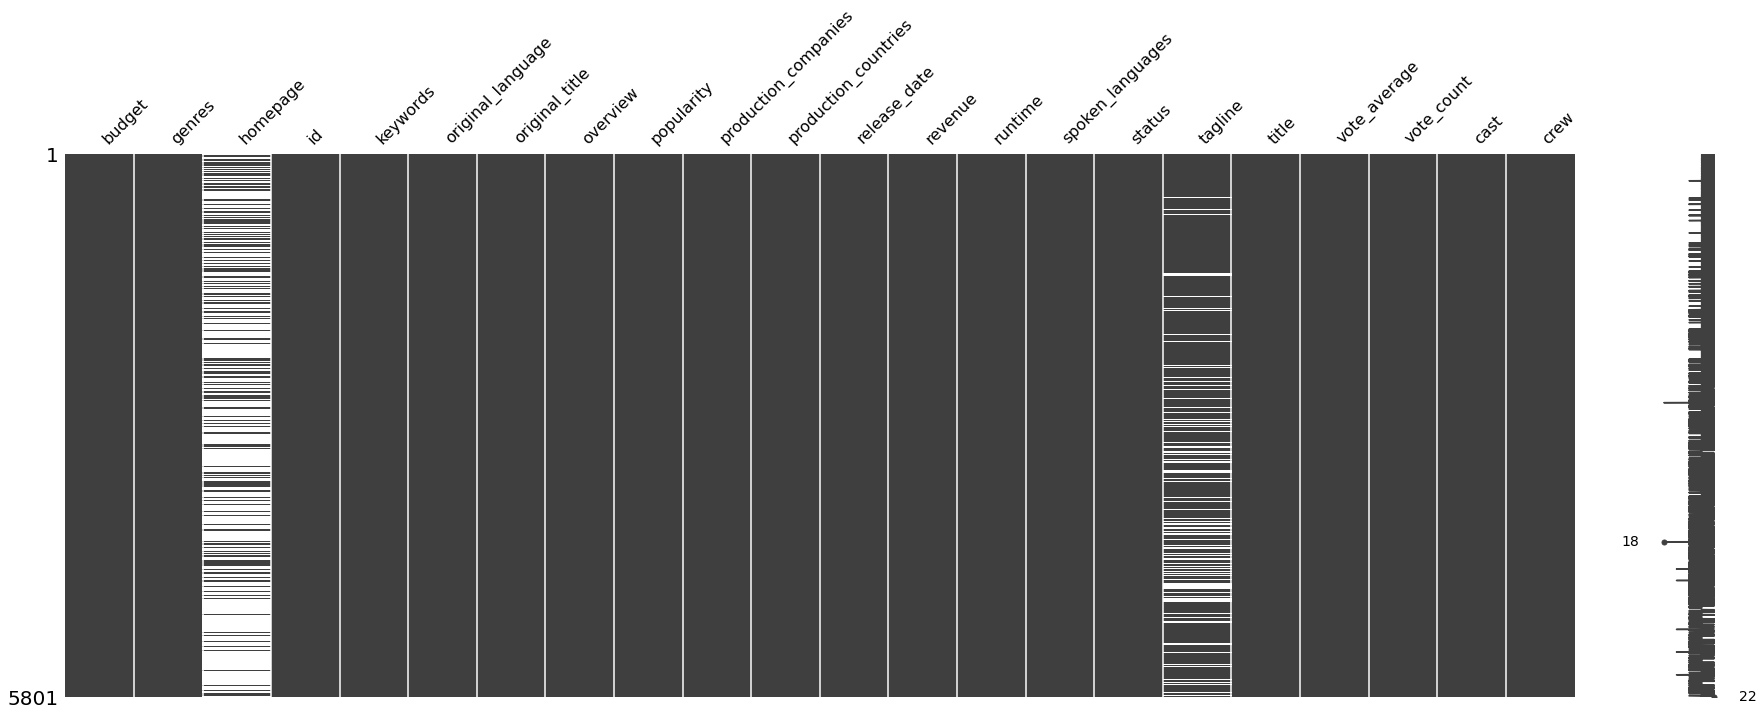

In [12]:
missingno.matrix(df, figsize=(30,10))

In [13]:
df.isnull().sum().sort_values(ascending=False)

homepage                3982
tagline                  979
overview                   6
runtime                    2
release_date               1
revenue                    0
cast                       0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
budget                     0
genres                     0
production_countries       0
production_companies       0
popularity                 0
original_title             0
original_language          0
keywords                   0
id                         0
crew                       0
dtype: int64

In [14]:
faltantes_percentual = (df.isnull().sum()/linhas) * 100

In [15]:
print(faltantes_percentual)

budget                   0.000000
genres                   0.000000
homepage                68.643337
id                       0.000000
keywords                 0.000000
original_language        0.000000
original_title           0.000000
overview                 0.103430
popularity               0.000000
production_companies     0.000000
production_countries     0.000000
release_date             0.017238
revenue                  0.000000
runtime                  0.034477
spoken_languages         0.000000
status                   0.000000
tagline                 16.876401
title                    0.000000
vote_average             0.000000
vote_count               0.000000
cast                     0.000000
crew                     0.000000
dtype: float64


### Dados duplicados

In [16]:
df[df.duplicated()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
5317,0,"[{'id': 27, 'name': 'Terror'}, {'id': 35, 'nam...",NaN,855433,"[{'id': 10292, 'name': 'gore'}, {'id': 224636,...",ca,Escape Room,NaN,691.754,[],...,0,0.0,"[{'english_name': 'Catalan', 'iso_639_1': 'ca'...",Released,NaN,Escape Room: La Pel·lícula,5.850,10,"[{'adult': False, 'gender': 2, 'id': 19826, 'k...","[{'adult': False, 'gender': 2, 'id': 19826, 'k..."
5318,750000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,561362,"[{'id': 798, 'name': 'sheriff'}, {'id': 3291, ...",en,Rust Creek,When an overachieving college senior makes a w...,20.661,"[{'id': 70784, 'logo_path': '/17G3JkSIjyFBbvSk...",...,0,108.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Choose your prey carefully,Rust Creek,6.420,232,"[{'adult': False, 'gender': 1, 'id': 1345419, ...","[{'adult': False, 'gender': 0, 'id': 17854, 'k..."
5319,0,"[{'id': 53, 'name': 'Thriller'}]",NaN,567738,"[{'id': 1930, 'name': 'kidnapping'}, {'id': 17...",en,American Hangman,An unidentified man posts a live feed on socia...,9.095,"[{'id': 806, 'logo_path': '/kcNh09qqR2Pkw1JAzR...",...,0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A new kind of trial,American Hangman,6.100,114,"[{'adult': False, 'gender': 2, 'id': 55636, 'k...","[{'adult': False, 'gender': 0, 'id': 147474, '..."
5320,18000000,"[{'id': 18, 'name': 'Drama'}, {'id': 12, 'name...",NaN,508763,"[{'id': 818, 'name': 'based on novel or book'}...",en,A Dog's Way Home,"The adventure of Bella, a dog who embarks on a...",44.774,"[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu...",...,17643857,96.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A lot can happen between lost and found.,A Dog's Way Home,7.303,914,"[{'adult': False, 'gender': 1, 'id': 15852, 'k...","[{'adult': False, 'gender': 2, 'id': 1270, 'kn..."
5321,37500000,"[{'id': 35, 'name': 'Comédia'}, {'id': 18, 'na...",NaN,440472,"[{'id': 9672, 'name': 'based on true story'}, ...",en,The Upside,Phillip is a wealthy quadriplegic who needs a ...,26.039,"[{'id': 308, 'logo_path': '/e8F3mQM7DkJ5SfYYDp...",...,111353135,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Based on a true story.,The Upside,7.100,987,"[{'adult': False, 'gender': 2, 'id': 55638, 'k...","[{'adult': False, 'gender': 2, 'id': 29, 'know..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5796,100000000,"[{'id': 16, 'name': 'Animação'}, {'id': 28, 'n...",NaN,431693,"[{'id': 470, 'name': 'spy'}, {'id': 1436, 'nam...",en,Spies in Disguise,Super spy Lance Sterling and scientist Walter ...,48.499,"[{'id': 25, 'logo_path': '/qZCc1lty5FzX30aOCVR...",...,171616764,102.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Super Spy. Super Fly.,Spies in Disguise,7.684,2319,"[{'adult': False, 'gender': 2, 'id': 2888, 'kn...","[{'adult': False, 'gender': 1, 'id': 611, 'kno..."
5797,40000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.sonypictures.com/movies/littlewomen,331482,"[{'id': 242, 'name': 'new york city'}, {'id': ...",en,Little Women,Four sisters come of age in America in the aft...,40.786,"[{'id': 5, 'logo_path': '/71BqEFAF4V3qjjMPCpLu...",...,216601214,135.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,Own your story,Little Women,7.918,4933,"[{'adult': False, 'gender': 1, 'id': 36592, 'k...","[{'adult': False, 'gender': 2, 'id': 376, 'kno..."
5798,100000000,"[{'id': 10752, 'name': 'Guerra'}, {'id': 18, '...",NaN,530915,"[{'id': 2504, 'name': 'world war i'}, {'id': 4...",en,1917,"At the height of the First World War, two youn...",43.480,"[{'id': 7, 'logo_path': '/vru2SssLX3FPhnKZGtYw...",...,374733942,119.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Time is the enemy,1917,7.974,9955,"[{'adult': False, 'gender': 2, 'id': 

In [154]:
df = df.drop_duplicates()

## Primeiras análises em cada feature

#### Budget: Orçamento do filme em dolar

In [17]:
df["budget"].dtype

dtype('int64')

In [18]:
df["budget"].isnull().sum()

0

In [19]:
df["budget"].describe().round(2)

count    5.801000e+03
mean     2.918906e+07
std      4.276349e+07
min      0.000000e+00
25%      3.000000e+00
50%      1.300000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

In [20]:
df['budget'].min()

0

In [21]:
df['budget'].max()

380000000

In [22]:
#Gráfico de dispersão para os anos - para saber se existe alguns anoss outliers
figura0 = go.Box(y=df["budget"],
                 name = "budget",
                 marker = {"color":'#f39c12'})

data = [figura0]

layout = go.Layout(title="Dispersão do orçamento dos filmes",
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   yaxis = {"title":"Orçamento dos filmes"},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')

#Utilizando os argumentos paper_bgcolor e plot_bgcolor, vamos alterar a cor de fundo do gráfico.

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

#### genres: Lista de dicionário com todos os gêneros associados ao filme

In [23]:
df["genres"].dtype

dtype('O')

In [24]:
df["genres"].isnull().sum()

0

In [25]:
df["genres"].head()

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

####  homepage: Site oficional do filme - (3982 dados faltantes)

In [26]:
df["homepage"].dtype

dtype('O')

In [27]:
df["homepage"].isnull().sum()

3982

Muitos dados faltantes, cerca de 70%

In [28]:
df["homepage"].head()

0                     http://www.avatarmovie.com/
1    http://disney.go.com/disneypictures/pirates/
2     http://www.sonypictures.com/movies/spectre/
3              http://www.thedarkknightrises.com/
4            http://movies.disney.com/john-carter
Name: homepage, dtype: object

#### id: Identificação (ID) do filme

In [29]:
df["id"].dtype

dtype('int64')

In [30]:
df["id"].isnull().sum()

0

In [31]:
df["id"].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

#### keywords: Palavras chaves associadas 

Lista de dicionários contendo as palavras chaves

In [32]:
df["keywords"].dtype

dtype('O')

In [33]:
df["keywords"].isnull().sum()

0

In [34]:
df["keywords"].head()

0    [{"id": 1463, "name": "culture clash"}, {"id":...
1    [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2    [{"id": 470, "name": "spy"}, {"id": 818, "name...
3    [{"id": 849, "name": "dc comics"}, {"id": 853,...
4    [{"id": 818, "name": "based on novel"}, {"id":...
Name: keywords, dtype: object

#### original_language: Idioma original do filme

In [35]:
df["original_language"].dtype

dtype('O')

In [36]:
df["original_language"].isnull().sum()

0

In [37]:
df["original_language"].head()

0    en
1    en
2    en
3    en
4    en
Name: original_language, dtype: object

In [38]:
df["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el', 'ca'], dtype=object)

In [39]:
df["original_language"].value_counts()

en    5478
fr      78
es      38
zh      28
de      27
ja      20
hi      19
it      14
cn      12
ru      11
ko      11
pt      10
da       7
sv       5
nl       4
fa       4
ar       3
he       3
ca       3
th       3
cs       2
id       2
tr       2
ta       2
ro       2
el       1
ps       1
sl       1
no       1
te       1
hu       1
ky       1
xx       1
pl       1
af       1
nb       1
is       1
vi       1
Name: original_language, dtype: int64

In [40]:
df["original_language"].describe()

count     5801
unique      38
top         en
freq      5478
Name: original_language, dtype: object

In [41]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(x =  df["original_language"].value_counts().index[1:10],
                y =  df["original_language"].value_counts().values[1:10],
                marker = {"color":"Orange",
                              "line": {'width': 2,
                                      'color': '#c0392b'}})

layout = go.Layout(title= "Top 10 - Idiomas originais de filmes",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Idiomas originais"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

Deixamos o ingles de lado no gráfico acima, disparado esta em primeiro lugar com 5478

#### original_title: Título original do filme

In [42]:
df["original_title"].dtype

dtype('O')

In [43]:
df["original_title"].isnull().sum()

0

In [44]:
df["original_title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: original_title, dtype: object

In [45]:
df["original_title"].describe()

count              5801
unique             5296
top       The Lion King
freq                  4
Name: original_title, dtype: object

In [46]:
df["original_title"].unique()

array(['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre',
       ..., '1917', 'Just Mercy', 'Clemency'], dtype=object)

#### overview: Breve descrição do filme (6 dados faltantes)

In [47]:
df["overview"].dtype

dtype('O')

In [48]:
df["overview"].isnull().sum()

6

In [49]:
df["overview"].describe()

count                                                  5795
unique                                                 5303
top       When a professor develops a vaccine that elimi...
freq                                                      4
Name: overview, dtype: object

In [50]:
df["overview"].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

#### popularity: Pontuação dada pelo TMDB

In [51]:
df["popularity"].dtype

dtype('float64')

In [52]:
df["popularity"].isnull().sum()

0

In [53]:
df["popularity"].describe()

count    5801.000000
mean       25.588242
std        42.336933
min         0.000000
25%         5.871930
50%        14.566664
75%        30.556135
max       875.581305
Name: popularity, dtype: float64

In [54]:
#Plotando um hisograma dos anos 
trace1 = go.Histogram(x =  df["popularity"],
                      marker = {"color":"Green",
                              "line": {'width': 2,
                                      'color': '#c0392b'}})

layout = go.Layout(title= "Histograma da popularidade dos filmes",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Popularidade"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### production_companies: Produtoras envolvidas na produção do filme

lista de dicionários contendo a produtora

In [55]:
df["production_companies"].dtype

dtype('O')

In [56]:
df["production_companies"].isnull().sum()

0

In [57]:
df["production_companies"].head()

0    [{"name": "Ingenious Film Partners", "id": 289...
1    [{"name": "Walt Disney Pictures", "id": 2}, {"...
2    [{"name": "Columbia Pictures", "id": 5}, {"nam...
3    [{"name": "Legendary Pictures", "id": 923}, {"...
4          [{"name": "Walt Disney Pictures", "id": 2}]
Name: production_companies, dtype: object

#### release_date: Data de Lançamento do Filme (1 dado faltante)

In [58]:
df["release_date"].dtype

dtype('O')

In [59]:
df["release_date"].isnull().sum()

1

In [60]:
df["release_date"] = pd.to_datetime(df["release_date"], format="%Y-%m-%d")

In [61]:
df["release_date"].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



count                    5800
unique                   3601
top       2019-11-08 00:00:00
freq                       15
first     1913-05-01 00:00:00
last      2022-07-21 00:00:00
Name: release_date, dtype: object

In [62]:
df["release_date"].dt.year

0       2009.0
1       2007.0
2       2015.0
3       2012.0
4       2012.0
         ...  
5796    2019.0
5797    2019.0
5798    2019.0
5799    2019.0
5800    2019.0
Name: release_date, Length: 5801, dtype: float64

In [63]:
#Plotando um hisograma por ano
trace1 = go.Histogram(x =  df["release_date"].dt.year,
                      marker = {"color":"red",
                              "line": {'width': 2,
                                      'color': 'black'}})

layout = go.Layout(title= "Quantidade de filmes por ano (1913 - 2022)",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Ano"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### revenue - Receita

In [106]:
df["revenue"].dtype

dtype('int64')

In [107]:
df["revenue"].isnull().sum()

0

In [108]:
df["revenue"].head()

0    2787965087
1     961000000
2     880674609
3    1084939099
4     284139100
Name: revenue, dtype: int64

In [110]:
#Plotando um hisograma com a receita dos filmes
trace1 = go.Histogram(x =  df["revenue"],
                      marker = {"color":"pink",
                              "line": {'width': 2,
                                      'color': 'orange'}})

layout = go.Layout(title= "Receita dos filmes (1913 - 2022)",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Receitas"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### runtime - Tempo de duração do filme em minutos (2 dados faltantes)

In [64]:
df["runtime"].dtype

dtype('float64')

In [65]:
df["runtime"].isnull().sum()

2

In [66]:
df["runtime"].describe()

count    5799.000000
mean      106.932402
std        22.372276
min         0.000000
25%        94.000000
50%       104.000000
75%       118.000000
max       338.000000
Name: runtime, dtype: float64

In [67]:
#df["runtime"] = df["runtime"].astype(int)

In [68]:
#Plotando um hisograma por ano
trace1 = go.Histogram(x =  df["runtime"],
                      marker = {"color":"orange",
                              "line": {'width': 2,
                                      'color': 'white'}})

layout = go.Layout(title= "tempo de duração dos filmes",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"Ano"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [111]:
#Gráfico de dispersão para os anos - para saber se existe alguns anoss outliers
figura0 = go.Box(y=df["revenue"],
                 name = "Receita",
                 marker = {"color":'#f39c12'})

data = [figura0]

layout = go.Layout(title="Dispersão da receita dos filmes (1913 a 2022)",
                   titlefont = {'family': 'Arial',
                                'size': 22,
                                'color': '#7f7f7f'},
                   yaxis = {"title":"Receita"},
                   paper_bgcolor = 'rgb(243, 243, 243)',
                   plot_bgcolor = 'rgb(243, 243, 243)')

#Utilizando os argumentos paper_bgcolor e plot_bgcolor, vamos alterar a cor de fundo do gráfico.

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


#### spoken_languages: Idiomas falados no filme

lista de dicionarios contendo as linguagens dos filmes

In [70]:
df["spoken_languages"].dtype

dtype('O')

In [71]:
df["spoken_languages"].isnull().sum()

0

In [72]:
df["spoken_languages"].head()

0    [{"iso_639_1": "en", "name": "English"}, {"iso...
1             [{"iso_639_1": "en", "name": "English"}]
2    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3             [{"iso_639_1": "en", "name": "English"}]
4             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, dtype: object

#### status: Status do filme (lançado, para ser lançado, anunciado, etc)

In [73]:
df["status"].dtype

dtype('O')

In [74]:
df["status"].isnull().sum()

0

In [75]:
df["status"].unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [76]:
df["status"].value_counts()

Released           5793
Rumored               5
Post Production       3
Name: status, dtype: int64

#### tagline - Tagline do filme (979 dados faltantes)

In [77]:
df["tagline"].dtype

dtype('O')

In [78]:
df["tagline"].isnull().sum()

979

In [79]:
df["tagline"].head()

0                       Enter the World of Pandora.
1    At the end of the world, the adventure begins.
2                             A Plan No One Escapes
3                                   The Legend Ends
4              Lost in our world, found in another.
Name: tagline, dtype: object

In [80]:
df["tagline"].describe()

count                       4822
unique                      4374
top       Based on a true story.
freq                           6
Name: tagline, dtype: object

#### title: Titulo oficial do filme

In [81]:
df["title"].dtype

dtype('O')

In [82]:
df["title"].isnull().sum()

0

In [83]:
df["title"].head()

0                                      Avatar
1    Pirates of the Caribbean: At World's End
2                                     Spectre
3                       The Dark Knight Rises
4                                 John Carter
Name: title, dtype: object

In [84]:
df["title"].describe()

count           5801
unique          5289
top       Skin Trade
freq               4
Name: title, dtype: object

#### vote_average: Avaliação média do filme

In [85]:
df['vote_average'].dtype

dtype('float64')

In [86]:
df['vote_average'].isnull().sum()

0

In [87]:
df['vote_average'].head()

0    7.2
1    6.9
2    6.3
3    7.6
4    6.1
Name: vote_average, dtype: float64

In [88]:
#Plotando um hisograma nota
trace1 = go.Histogram(x =  df["vote_average"],
                      marker = {"color":"orange",
                              "line": {'width': 2,
                                      'color': 'red'}})

layout = go.Layout(title= "Avaliação média dos filmes",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"nota média"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [89]:
df[df["vote_average"] == 10.0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3519,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,89861,"[{""id"": 131, ""name"": ""italy""}, {""id"": 8250, ""n...",en,Stiff Upper Lips,Stiff Upper Lips is a broad parody of British ...,0.356495,[],...,0,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Stiff Upper Lips,10.0,1,"[{""cast_id"": 11, ""character"": ""Emily"", ""credit...","[{""credit_id"": ""52fe4a2f9251416c910c5edb"", ""de..."
4045,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,78373,"[{""id"": 1415, ""name"": ""small town""}, {""id"": 15...",en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",0.376662,"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""...",...,565592,97.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,in the middle of nowhere they had everything,"Dancer, Texas Pop. 81",10.0,1,"[{""cast_id"": 1, ""character"": ""Keller Coleman"",...","[{""credit_id"": ""52fe499bc3a368484e13445b"", ""de..."
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",NaN,361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],...,0,90.0,[],Released,"A story about second, second chances",Me You and Five Bucks,10.0,2,[],[]
4662,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,40963,"[{""id"": 10183, ""name"": ""independent film""}]",en,Little Big Top,An aging out of work clown returns to his smal...,0.092100,"[{""name"": ""Fly High Films"", ""id"": 24248}]",...,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Rumored,NaN,Little Big Top,10.0,1,"[{""cast_id"": 0, ""character"": ""Seymour"", ""credi...",[]
5246,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,766507,"[{'id': 4862, 'name': 'alien life-form'}, {'id...",en,Prey,"On the Great Plains in 1719, Naru, a fierce an...",245.839000,"[{'id': 1302, 'logo_path': '/kQZtJdyphCmq292iG...",...,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They hunt to live. It lives to hunt.,Prey,10.0,2,"[{'adult': False, 'gender': 1, 'id': 1654001, ...","[{'adult': False, 'gender': 2, 'id': 1092, 'kn..."
5488,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,766507,"[{'id': 4862, 'name': 'alien life-form'}, {'id...",en,Prey,"On the Great Plains in 1719, Naru, a fierce an...",245.839000,"[{'id': 1302, 'logo_path': '/kQZtJdyphCmq292iG...",...,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They hunt to live. It lives to hunt.,Prey,10.0,2,"[{'adult': False, 'gender': 1, 'id': 1654001, ...","[{'adult': False, 'gender': 2, 'id': 1092, 'kn..."
5730,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,766507,"[{'id': 4862, 'name': 'alien life-form'}, {'id...",en,Prey,"On the Great Plains in 1719, Naru, a fierce an...",245.839000,"[{'id': 1302, 'logo_path': '/kQZtJdyphCmq292iG...",...,0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They hunt to live. It lives to hunt.,Prey,10.0,2,"[{'adult': False, 'gender': 1, 'id': 1654001, ...","[{'adult': False, 'gender': 2, 'id': 1092, 'kn..."


In [90]:
df[df["vote_average"] == 0]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
1464,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,310706,[],en,Black Water Transit,In this action thriller set in post-Katrina Ne...,0.126738,"[{""name"": ""Capitol Films"", ""id"": 826}]",...,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Black Water Transit,0.0,0,"[{""cast_id"": 4, ""character"": ""Jack"", ""credit_i...","[{""credit_id"": ""5500016ac3a3685b9900106a"", ""de..."
3669,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.romeothemovie.com/,113406,[],en,Should've Been Romeo,"A self-centered, middle-aged pitchman for a po...",0.407030,"[{""name"": ""Phillybrook Films"", ""id"": 65147}]",...,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Even Shakespeare didn't see this one coming.,Should've Been Romeo,0.0,0,"[{""cast_id"": 4, ""character"": ""Joey"", ""credit_i...","[{""credit_id"": ""5617d84d92514166e2001e21"", ""de..."
3670,0,"[{""id"": 10751, ""name"": ""Family""}]",NaN,447027,[],en,Running Forever,After being estranged since her mother's death...,0.028756,"[{""name"": ""New Kingdom Pictures"", ""id"": 41671}]",...,0,88.0,[],Released,NaN,Running Forever,0.0,0,[],[]
3852,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,395766,"[{""id"": 11162, ""name"": ""miniseries""}]",en,The Secret,The Secret is the story of a real-life double ...,0.042346,[],...,0,200.0,[],Released,NaN,The Secret,0.0,0,"[{""cast_id"": 0, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""586756379251413e4c006618"", ""de..."
3855,3500000,"[{""id"": 99, ""name"": ""Documentary""}]",http://www.timetochoose.com,370662,"[{""id"": 2210, ""name"": ""climate change""}, {""id""...",en,Time to Choose,Academy Award® winning director Charles Fergus...,1.618138,"[{""name"": ""Representational Pictures"", ""id"": 8...",...,0,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Climate change for good.,Time to Choose,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""565d1089c3a368758d001059"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4771,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,220490,[],en,Her Cry: La Llorona Investigation,"Crew of ""Paranormal Legends"" went to film thei...",0.056459,[],...,0,89.0,[],Released,NaN,Her Cry: La Llorona Investigation,0.0,0,"[{""cast_id"": 1, ""character"": ""Tina"", ""credit_i...","[{""credit_id"": ""52fe4dab9251416c7513cb8f"", ""de..."
4780,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,366967,[],en,Dutch Kills,A desperate ex-con is forced to gather his old...,0.038143,[],...,0,90.0,[],Released,NaN,Dutch Kills,0.0,0,"[{""cast_id"": 4, ""character"": ""Val"", ""credit_id...","[{""credit_id"": ""563d13ec9251414c70007d5e"", ""de..."
4785,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,287625,[],en,Stories of Our Lives,Created by the members of a Nairobi-based arts...,0.327794,[],...,0,60.0,"[{""iso_639_1"": ""sw"", ""name"": ""Kiswahili""}, {""i...",Released,NaN,Stories of Our Lives,0.0,0,"[{""cast_id"": 8, ""character"": """", ""credit_id"": ...","[{""credit_id"": ""549e790a9251414d27003096"", ""de..."
4794,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 27, ""n...",NaN,286939,[],en,Sanctuary: Quite a Conundrum,"It should have been just a normal day of sex, ...",0.166513,"[{""name"": ""Gold Lion Films"", ""id"": 37870}, {""n...",...,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Sanctuary: Quite a Conundrum,0.0,0,"[{""cast_id"": 3, ""character"": ""Mimi"", ""credit_i...","[{""credit_id"": ""545f8107c3a3686cbb0041fd"", ""de..."


#### vote_count: Número de votos contabilizados pelo TMDB

In [91]:
df['vote_count'].dtype

dtype('int64')

In [92]:
df['vote_count'].isnull().sum()

0

In [93]:
df['vote_count'].head()

0    11800
1     4500
2     4466
3     9106
4     2124
Name: vote_count, dtype: int64

In [94]:
df['vote_count'].describe()

count     5801.000000
mean       937.874677
std       1800.617662
min          0.000000
25%         67.000000
50%        298.000000
75%        973.000000
max      25066.000000
Name: vote_count, dtype: float64

In [95]:
#Plotando um hisograma nota
trace1 = go.Histogram(x =  df["vote_count"],
                      marker = {"color":"orange",
                              "line": {'width': 2,
                                      'color': 'red'}})

layout = go.Layout(title= "Avaliação média dos filmes",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"nota média"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### cast: Elenco do filme

Lista de dicionários

In [96]:
df["cast"].dtype

dtype('O')

In [97]:
df["cast"].isnull().sum()

0

In [98]:
df["cast"].head()

0    [{"cast_id": 242, "character": "Jake Sully", "...
1    [{"cast_id": 4, "character": "Captain Jack Spa...
2    [{"cast_id": 1, "character": "James Bond", "cr...
3    [{"cast_id": 2, "character": "Bruce Wayne / Ba...
4    [{"cast_id": 5, "character": "John Carter", "c...
Name: cast, dtype: object

#### crew: Equipe Técnica

Lista de dicionários

In [99]:
df["crew"].dtype

dtype('O')

In [100]:
df["crew"].isnull().sum()

0

In [101]:
df["crew"].head()

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "de...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "de...
Name: crew, dtype: object

## Mais Análises e interpretação das features (colunas)

#### Retorno dos filmes (receita todal - orçamento gasto no filme)

In [121]:
df["budget"] = df["budget"].replace(0, np.nan)

df['return'] = df["revenue"] - df["budget"]
df['return'].head(2)

0    2.550965e+09
1    6.610000e+08
Name: return, dtype: float64

#### Taxa de retorno (em porcentagem)

In [122]:
df['return_rate'] = (df["revenue"]/df["budget"])*100
df.head().transpose()

,0,1,2,3,4
budget,237000000.0,300000000.0,245000000.0,250000000.0,260000000.0
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.437577,139.082615,107.376788,112.31295,43.926995
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


#### Coluna com os anos

In [123]:
df['year'] = df["release_date"].dt.year

In [124]:
df['year'].isnull().sum()

1

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5801 entries, 0 to 5800
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4359 non-null   float64       
 1   genres                5801 non-null   object        
 2   homepage              1819 non-null   object        
 3   id                    5801 non-null   int64         
 4   keywords              5801 non-null   object        
 5   original_language     5801 non-null   object        
 6   original_title        5801 non-null   object        
 7   overview              5795 non-null   object        
 8   popularity            5801 non-null   float64       
 9   production_companies  5801 non-null   object        
 10  production_countries  5801 non-null   object        
 11  release_date          5800 non-null   datetime64[ns]
 12  revenue               5801 non-null   int64         
 13  runtime           

In [126]:
df["year"].dropna(inplace = True)

#### Filmes com a maior retorno financeiro e o ano

In [128]:
df[["original_title", "year", "return"]].sort_values("return", ascending=False).head(5)

,original_title,year,return
0,Avatar,2009.0,2.550965e+09
5629,Avengers: Endgame,2019.0,2.441801e+09
5145,Avengers: Endgame,2019.0,2.441801e+09
5387,Avengers: Endgame,2019.0,2.441801e+09
4894,Avengers: Infinity War,2018.0,1.746240e+09


#### Filmes com a maior taxa de retorno e o ano

In [130]:
df[["original_title", "year", "return_rate"]].sort_values("return_rate", ascending=False).head(5)

,original_title,year,return_rate
4238,Modern Times,1936.0,8.500000e+08
3137,Nurse 3-D,2013.0,1.000000e+08
4577,Paranormal Activity,2007.0,1.289039e+06
4582,Tarnation,2003.0,5.330339e+05
4496,The Blair Witch Project,1999.0,4.133333e+05


#### Palavras mais frequentes nos títulos dos filmes

In [134]:
df["title"].astype

<bound method NDFrame.astype of 0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
5796                           Spies in Disguise
5797                                Little Women
5798                                        1917
5799                                  Just Mercy
5800                                    Clemency
Name: title, Length: 5801, dtype: object>

In [136]:
#Juntando todos os titulos e separando com um espaço
all_titles = " ".join(df["title"])
print(all_titles)

Avatar Pirates of the Caribbean: At World's End Spectre The Dark Knight Rises John Carter Spider-Man 3 Tangled Avengers: Age of Ultron Harry Potter and the Half-Blood Prince Batman v Superman: Dawn of Justice Superman Returns Quantum of Solace Pirates of the Caribbean: Dead Man's Chest The Lone Ranger Man of Steel The Chronicles of Narnia: Prince Caspian The Avengers Pirates of the Caribbean: On Stranger Tides Men in Black 3 The Hobbit: The Battle of the Five Armies The Amazing Spider-Man Robin Hood The Hobbit: The Desolation of Smaug The Golden Compass King Kong Titanic Captain America: Civil War Battleship Jurassic World Skyfall Spider-Man 2 Iron Man 3 Alice in Wonderland X-Men: The Last Stand Monsters University Transformers: Revenge of the Fallen Transformers: Age of Extinction Oz: The Great and Powerful The Amazing Spider-Man 2 TRON: Legacy Cars 2 Green Lantern Toy Story 3 Terminator Salvation Furious 7 World War Z X-Men: Days of Future Past Star Trek Into Darkness Jack the Giant 

In [139]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, 
                            background_color = "white", 
                            height=2000, width=4000).generate(all_titles)

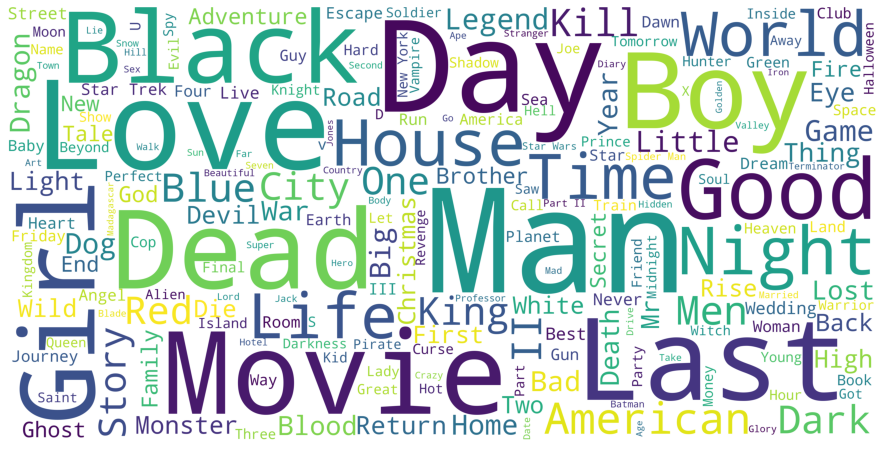

In [140]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### Palavras mais frequentes no OVERVIEW dos filmes

In [145]:
df["overview"] = df["overview"].astype("str")

In [146]:
df["overview"].astype

<bound method NDFrame.astype of 0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
5796    Super spy Lance Sterling and scientist Walter ...
5797    Four sisters come of age in America in the aft...
5798    At the height of the First World War, two youn...
5799    The powerful true story of Harvard-educated la...
5800    Years of carrying out death row executions hav...
Name: overview, Length: 5801, dtype: object>

In [147]:
all_overview = " ".join(df["overview"])
print(all_overview)

 It's the fictional tale of a wayward 9th grader, Ralph (Adam Butcher), who is secretly living on his own while his widowed, hospitalized mother remains immersed in a coma. Frequently in trouble with Father Fitzpatrick (Gordon Pinsent), the principal of his all-boys, Catholic school, Ralph is considered something of a joke among peers until he decides to pull off a miracle that could save his mother, i.e., winning the Boston Marathon.  Coached by a younger priest and former runner, Father Hibbert (Campbell Scott), whose cynicism has been lifted by the boy's pure hope, Ralph applies himself to his unlikely mission, fending off naysayers and getting help along a very challenging path from sundry allies and friends. Over the course of a midsummer night in Fermanagh in 1890, an unsettled daughter of the Anglo-Irish aristocracy encourages her father's valet to seduce her. Young writer, Richard Collier is met on the opening night of his first play by an old lady who begs him to, "Come back t

In [148]:
title_wordcloud = WordCloud(stopwords = STOPWORDS, 
                            background_color = "yellow", 
                            height=2000, width=4000).generate(all_titles)

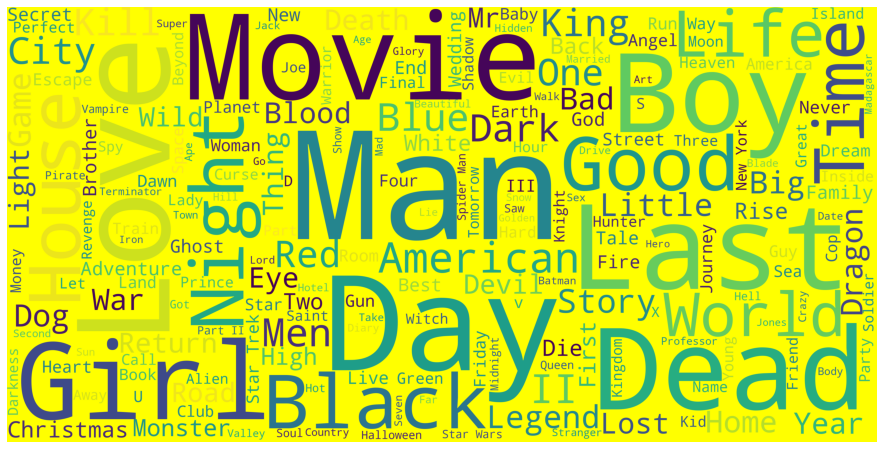

In [149]:
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

#### Quais meses são lançados mais filmes

In [165]:
#Plotando um hisograma por ano
trace1 = go.Histogram(x =  df["release_date"].dt.month,
                      marker = {"color":"red",
                              "line": {'width': 2,
                                      'color': 'black'}})

layout = go.Layout(title= "Quantidade de filmes por mês (1913 - 2022)",
                   yaxis = {"title": "Quantidade"},
                   xaxis = {"title":"mês"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### Popularidade dos filmes - os 10 mais

In [157]:
popularidade = df[["original_title", "popularity", "year"]].sort_values("popularity", ascending=False)
popularidade.head(9)

,original_title,popularity,year
546,Minions,875.581305,2015.0
95,Interstellar,724.247784,2014.0
5075,Escape Room,691.754000,2022.0
5010,Venom,602.139000,2021.0
4894,Avengers: Infinity War,598.371000,2018.0
788,Deadpool,514.569956,2016.0
5141,Family,507.514000,2021.0
94,Guardians of the Galaxy,481.098624,2014.0
127,Mad Max: Fury Road,434.278564,2015.0


In [160]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(x =  popularidade["original_title"][0:10],
                y =  popularidade["popularity"][0:10],
                marker = {"color":"yellow",
                              "line": {'width': 2,
                                      'color': 'black'}})

layout = go.Layout(title= "Top 10 - Filmes mais populares",
                   yaxis = {"title": "Populatidade"},
                   xaxis = {"title":"Titulo do filme"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

#### Vote Count

In [162]:
vote_count = df[["title", 'vote_count', 'year']].sort_values("vote_count", ascending=False)
vote_count.head(10)

,title,vote_count,year
4894,Avengers: Infinity War,25066,2018.0
5145,Avengers: Endgame,21496,2019.0
5247,Joker,20969,2019.0
4833,Black Panther,19347,2018.0
5199,The Lion King,15551,1994.0
4908,Deadpool 2,14916,2018.0
5032,Bohemian Rhapsody,14877,2018.0
96,Inception,13752,2010.0
5106,Captain Marvel,13302,2019.0
4872,Ready Player One,13127,2018.0


In [164]:
#Plotando o rank dos top 10 fatores que influenciam no preço do imovel
trace1 = go.Bar(x =  vote_count["title"][0:10],
                y =  vote_count["vote_count"][0:10],
                marker = {"color":"red",
                              "line": {'width': 2,
                                      'color': 'black'}})

layout = go.Layout(title= "Top 10 - Filmes mais votados",
                   yaxis = {"title": "votos"},
                   xaxis = {"title":"Titulo do filme"})

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)